## Address standardisation
This is a project for recommending potential standardised addresses based on a given input. This is for Athens / Attica addresses. Previous filtering through PC is recommended

### Library installation and import

In [ ]:
!pip install osmnx
!pip install geopandas
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install fuzzywuzzy
!pip install python-Levenshtein  # Optional for faster performance

In [2]:
import osmnx as ox
import geopandas as gpd
import numpy as np
import pandas as pd
from fuzzywuzzy import process

### Download Data from openstreetmap and pre-process

In [36]:
# Specify the name that is used to seach for the data
place_name = "attica"

In [37]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [38]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((22.79081 36.32057, 22.79081 36...",38.378158,35.741416,24.173419,22.790806,80430975,relation,957716,37.75618,23.666901,boundary,administrative,10,0.501473,state_district,Attica,"Attica, Greece"


<Axes: >

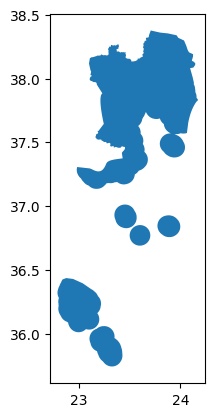

In [39]:
area.plot()

In [40]:
# Retrieve the street network (graph) within the area boundary
# 'network_type' can be 'drive', 'bike', 'walk', etc., depending on your needs
graph = ox.graph_from_place(place_name)

# Convert the graph into a GeoDataFrame with edges (streets)
edges = ox.graph_to_gdfs(graph, nodes=False)

In [42]:
street_names = edges['name']

In [51]:
edges.columns

Index(['osmid', 'oneway', 'highway', 'reversed', 'length', 'geometry', 'lanes',
       'ref', 'name', 'maxspeed', 'bridge', 'service', 'width', 'access',
       'junction', 'tunnel', 'area', 'est_width'],
      dtype='object')

In [44]:
street_names = street_names.values
cleaned_street_names = street_names[~pd.isna(street_names)]

# Convert lists to strings before using drop_duplicates
unique_street_names = pd.Series([str(x) for x in street_names]).drop_duplicates().to_numpy()

### Find closest match using fuzzywuzzy's library

In [45]:
def find_closest_matches(input_address, addresses, num_matches=3):
    """
    Find the closest addresses to the input_address from a list of addresses.
    
    Parameters:
    - input_address: The address input by the user.
    - addresses: The list of cleaned addresses to compare against.
    - num_matches: The number of closest matches to return (default is 3).
    
    Returns:
    - A list of the closest matches.
    """
    # Use fuzzywuzzy's process.extract to find the closest matches
    closest_matches = process.extract(input_address, addresses, limit=num_matches)
    
    # Return just the addresses (not the scores)
    return [match[0] for match in closest_matches]


In [47]:
# Example user input
input_address = 'παλαιολόγου'

# Find the 3 closest matches
closest_matches = find_closest_matches(input_address, unique_street_names, num_matches=3)

# Print the closest matches
print("Closest matches:", closest_matches)

Closest matches: ['Παλαιολόγου', 'Κ. Παλαιολόγου', 'Παλαιολόγου Μαν.']
